<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-основных-параметров-данных" data-toc-modified-id="Изучение-основных-параметров-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение основных параметров данных</a></span></li><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных" data-toc-modified-id="Разделение-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разделение данных</a></span></li><li><span><a href="#Проверка-на-баланс-классов" data-toc-modified-id="Проверка-на-баланс-классов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка на баланс классов</a></span></li><li><span><a href="#Добавим-необходимые-функции" data-toc-modified-id="Добавим-необходимые-функции-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Добавим необходимые функции</a></span></li><li><span><a href="#Обучим-модели-классификации" data-toc-modified-id="Обучим-модели-классификации-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обучим модели классификации</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взешивание-классов" data-toc-modified-id="Взешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Комбинированный-метод" data-toc-modified-id="Комбинированный-метод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Комбинированный метод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком и поставлена задача на основании этих данных создать модель прогноза, уйдёт клиент из банка в ближайшее время или нет. 

Представленные данные имеют следущие признаки:
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата
- Целевой признак
- Exited — факт ухода клиента

Построим различные модели классификации, подберем для них параметры, обеспечивающие наилучшее качество моделей. И выберем из моделей наилучшую с предельно большим значением F1-меры. Дополнительно будем измерять AUC-ROC, сравнивать её значение с F1-мерой.

## Подготовка данных

### Изучение основных параметров данных

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_recall_curve

from sklearn.preprocessing import StandardScaler

from sklearn.utils import shuffle

pd.options.mode.chained_assignment = None

Прочитаем исходный файл

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Посмотрим тип данных и наличие пропусков

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В нашем файле 10000 записей о клиентах банка с параметрами:
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата
- Целевой признак
- Exited — факт ухода клиента

Посмотрим корреляцию наших данных

In [4]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.007322,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.021418,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.007322,-0.021418,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


Проверим наличие явных дубликатов

In [5]:
print('Явных дубликатов в данных:', df.duplicated().sum())

Явных дубликатов в данных: 0


**Вывод:**
- Есть пропуски в данных `tenure`
- Ненужные для дальнейшего агнализа данные `row_number, customer_id, surname`
- Необходимо преобразовать дискретные переменные `Geography и Gender` в удобные численные значения
- Приведем наименования столбцов к "змеиному" регистру

### Предобработка

Приведем наименования столбцов к "змеиному" регистру через функцию snake_case

In [6]:
def snake_case(str):
    return ''.join(['_' + i.lower() if i.isupper()
               else i for i in str]).lstrip('_')

df.columns = [snake_case(i) for i in df.columns]
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

Посмотрим на пропуски в `tenure` и подумаем чем их заменить

In [7]:
print('Уникальные значения tenure:', df.tenure.unique())

Уникальные значения tenure: [ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0. nan]


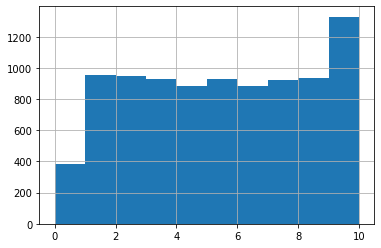

In [8]:
df.tenure.hist();

Видно что распределение `tenure` (сколько лет человек является клиентом банка) близко к равномерному и корреляция с другими параметрами минимальна. Возможности предположить, что пропуски это 0 у нас нет, так как 0 уже встречаются в наших данных. Заменим пропуски случайными числами от 0 до 10.

In [9]:
df.loc[df['tenure'].isna(), 'tenure'] = np.random.randint(0, 10, size=df.tenure.isna().sum())

Приведем все количественные значения с плавающей точкой к целочисленным значениям.

In [10]:
tag = ['estimated_salary', 'balance', 'tenure']
df[tag] = df[tag].astype('int')

Проверим что пропусков больше нет

In [11]:
df.tenure.isna().sum()

0

Проверим тип данных

In [12]:
df.dtypes

row_number           int64
customer_id          int64
surname             object
credit_score         int64
geography           object
gender              object
age                  int64
tenure               int64
balance              int64
num_of_products      int64
has_cr_card          int64
is_active_member     int64
estimated_salary     int64
exited               int64
dtype: object

Проверим получившееся распределение `tenure`

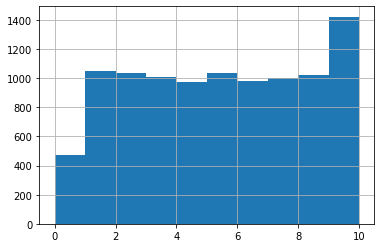

In [13]:
df.tenure.hist();

Убедимся что количество уникальных идентификаторов клиента совпадает с количеством объектов данных (10000).

In [14]:
print('Количество уникальных идентификаторов клиента:', df.customer_id.value_counts().sum())

Количество уникальных идентификаторов клиента: 10000


Так как для дальнейшего анализа нам не требуестя знание индекса строки в данных, уникального идентификатора клиента, фамилии (зависимости ухода клиента от этих данных нет), то удалим параметры `row_number, customer_id, surname`.

In [15]:
df.drop(['row_number', 'customer_id', 'surname'], axis=1, inplace=True)

In [16]:
print('Уникальные значения gender:', df.gender.unique())

Уникальные значения gender: ['Female' 'Male']


In [17]:
print('Уникальные значения geography:',df.geography.unique())

Уникальные значения geography: ['France' 'Spain' 'Germany']


Посмотрим матрицу рассеяния

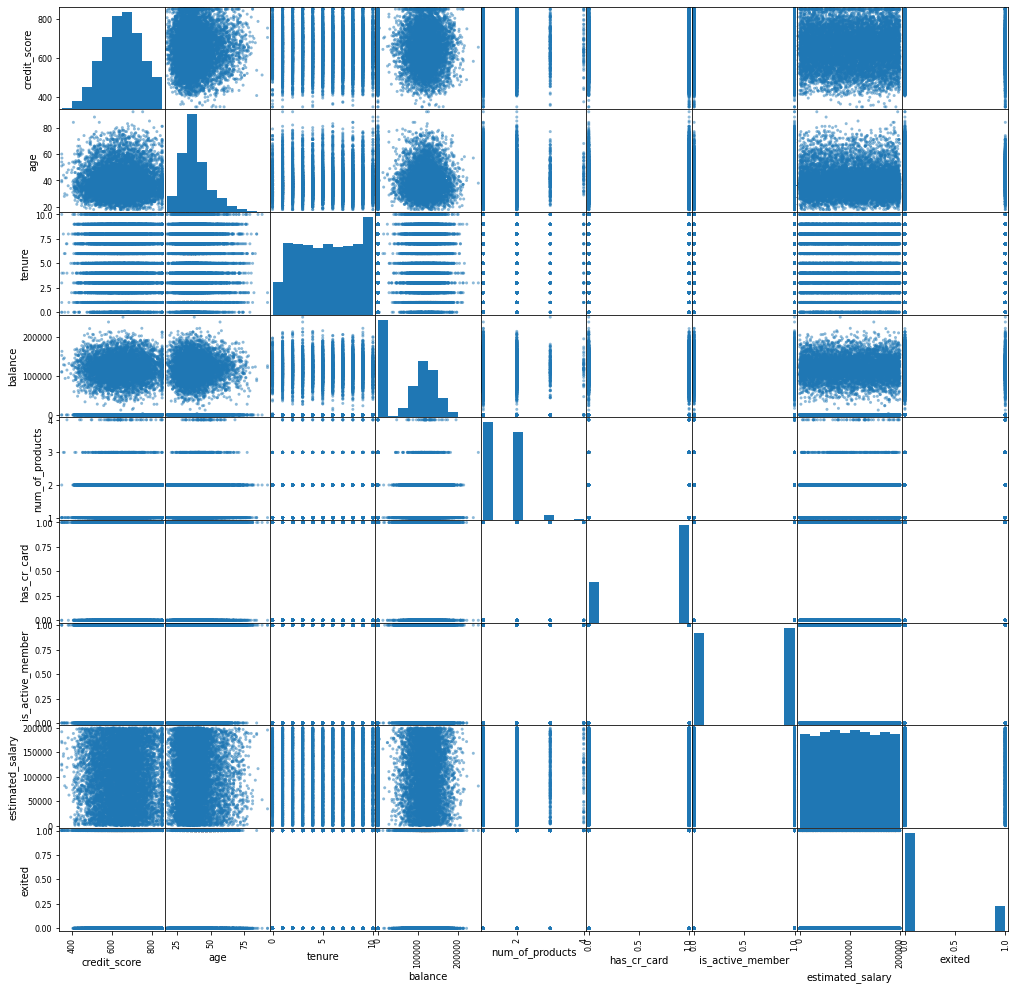

In [18]:
pd.plotting.scatter_matrix(df, figsize=(17, 17));

Явной корреляции и мультиколлениарности между параметрами не видно. Посмотрим на `balance`.

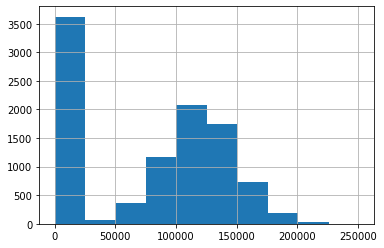

In [19]:
df.balance.hist();

Видно что баланс на счёте у многих клиентов равен 0. Возможно они пользуются для расчетов другим банком.  

Посмотрим распределение `estimated_salary` предполагаемой заработной платы.

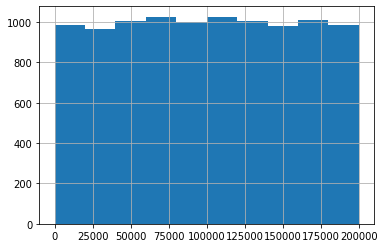

In [20]:
df.estimated_salary.hist();

Странное распределение. Так равномерно зарплаты не видел чтобы распределялись. И корреляция с другими параметрами минимальна. Скорее всего от этого параметра и результат будет мало зависеть. Надо задать вопрос, это точно зарплаты?... Или выгрузка данных производилсась равномерно по этому признаку?...

Преобразуем оставшиеся строковые дискретные переменные в удобные численные значения. У нас остались 2 нечисленные категориальные  переменные:
- Geography — страна проживания
- Gender — пол    

Так как нет значимости между разными значениями данных переменных, тоесть у них нет никакой иерархии, то применим технику OneHotEncoding.

In [21]:
df = pd.get_dummies(df, drop_first=True)

Посмотрим на получившийся датафрейм

In [22]:
df.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


**Вывод:** Проведена предварительная обработка данных.
- Заменены пропуски в `tenure` (сколько лет человек является клиентом банка) случайными числами в диапазоне распределения параметра. Природа пропусков непонятна. Необходимо уточнить почему они могли появится.
- Также необходимо уточнить, почему `estimated_salary` (предполагаемая заработная плата) имеет равномерное распределение. Возможно сдесь ошибка и это не предполагаемая заработная плата. Возможно также что выгрузка данных производилась равномерно по данному параметру.
- Удалены параметры `row_number, customer_id, surname`, так как для дальнейшего анализа нам не требуестя знание индекса строки в данных, уникального идентификатора клиента, фамилии (зависимости ухода клиента от этих данных нет).
- Преобразованы строковые дискретные переменные `Geography и Gender` в удобные численные значения техникой One Hot Encoding.

## Исследование задачи

### Разделение данных

Разделим данные на x - параметры и y - целевой признак. 

In [23]:
x = df.drop('exited', axis=1)
y = df.exited

~Для того чтобы модель равноценно относилась к различным параметрам, масштабируем `credit_score, age, tenure, estimated_salary`~

In [24]:
#tag = ['credit_score', 'age', 'tenure', 'estimated_salary', 'balance', 'num_of_products']
#scaler = StandardScaler().fit(x[tag])
#x[tag] = scaler.transform(x[tag])

Разделим данные на обучающую, валидационную и тестовую выборки в пропорции 60/20/20.

In [25]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.4, random_state = 7)

In [26]:
x_valid, x_test, y_valid, y_test = train_test_split(x_valid, y_valid, test_size=0.5, random_state = 7)

In [27]:
print(f'Размеры обучающих выборок {x_train.shape}, {y_train.shape}\
\nРазмеры валидационных выборок {x_valid.shape}, {y_valid.shape}\
\nРазмеры тестовых выборок {x_test.shape}, {y_test.shape}')

Размеры обучающих выборок (6000, 11), (6000,)
Размеры валидационных выборок (2000, 11), (2000,)
Размеры тестовых выборок (2000, 11), (2000,)


In [28]:
tag = ['credit_score', 'age', 'tenure', 'estimated_salary', 'balance', 'num_of_products']

scaler = StandardScaler().fit(x_train[tag])

x_train[tag] = scaler.transform(x_train[tag])
x_valid[tag] = scaler.transform(x_valid[tag])
x_test[tag] = scaler.transform(x_test[tag])

Теперь наша обучающая выборка выглядит так

In [29]:
x_train.head(5)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
8050,0.584215,-0.562414,-1.028932,-1.242621,0.802288,0,0,0.532599,0,0,1
1265,-1.217221,1.533243,0.004651,0.633985,2.502650,1,0,0.380518,0,0,0
961,0.355131,-0.371900,-0.339876,0.970488,-0.898075,1,0,0.234883,0,1,1
2510,-0.269644,1.247471,-1.028932,0.032290,-0.898075,1,1,-0.266864,0,0,0
8628,0.552977,0.485414,-0.684404,-1.242621,0.802288,0,1,0.913113,0,0,1


### Проверка на баланс классов

0    0.7963
1    0.2037
Name: exited, dtype: float64


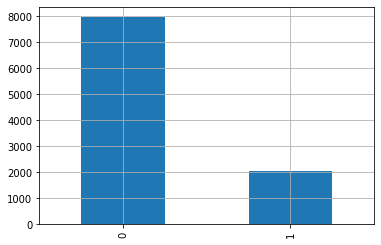

In [30]:
print(y.value_counts(normalize=True))
y.value_counts().plot(kind='bar', grid=True);

Видно что только 20% данных имеют `Exited = 1`, что подтверждает уход клиента из банка. Данные имеют дисбаланс, что влияет на качество обучаемых моделей.

### Добавим необходимые функции

Добавим функцию для подбора наилучших параметров случайного леса. Для поиска наилучшей модели и ее параметров введем переменную `super_best_score`, которой будем искать наибольшее значение необходимого нам параметра (в нашем случае f1-меру).

In [31]:
super_best_score = 0

In [32]:
def def_forest(features_train, target_train, class_weight):
    # Подберем сначала лучшее количество глубины дерева
    global super_best_score
    global super_best_model
    best_score = 0
    for depth in range(5, 30, 1):
        model = RandomForestClassifier(random_state=7, n_estimators=100, max_depth=depth, class_weight=class_weight)
        model.fit(features_train, target_train)
        predictions = model.predict(x_valid)
        score = f1_score(y_valid, predictions)
        if score > best_score:
            best_depth = depth
            best_score = score

    # Теперь подберем лучшее количество деревьев
    best_score = 0
    for est in range(10, 500, 10):
        model = RandomForestClassifier(random_state=7, n_estimators=est, max_depth=best_depth, class_weight=class_weight)
        model.fit(features_train, target_train)
        predictions = model.predict(x_valid)
        score = f1_score(y_valid, predictions)
        if score > best_score:
            best_est = est
            best_score = score
            best_model = model
        if score > super_best_score:
            super_best_score = score
            super_best_model = model
    
    # Посчитаем вероятность предсказаний для AUC-ROC
    probabilities = best_model.predict_proba(x_valid)[:, 1]
    roc_auc = roc_auc_score(y_valid, probabilities)
    
    print(f'Наилучшее количество деревьев {best_est} и лучшая глубина {best_depth} случайного леса при f1-мере {best_score}.\
          \nAUC-ROC при данных параметрах {roc_auc}')

Добавим функцию для подбора наилучших параметров решающего дерева.

In [33]:
def def_tree(features_train, target_train, class_weight):
    # Подберем лучшее количество глубины дерева
    global super_best_score
    global super_best_model
    best_score = 0
    for depth in range(5, 50, 1):
        model = DecisionTreeClassifier(random_state=7, max_depth=depth, class_weight=class_weight)
        model.fit(features_train, target_train)
        predictions = model.predict(x_valid)
        score = f1_score(y_valid, predictions)
        if score > best_score:
            best_depth = depth
            best_score = score
            best_model = model
        if score > super_best_score:
            super_best_score = score
            super_best_model = model

    # Посчитаем вероятность предсказаний для AUC-ROC
    probabilities = best_model.predict_proba(x_valid)[:, 1]
    roc_auc = roc_auc_score(y_valid, probabilities)
    
    print(f'Лучшая глубина решающего дерева {best_depth} при f1-мере {best_score}. \nAUC-ROC при данных параметрах {roc_auc}')

Добавим функцию для обучения логистической регрессии.

In [34]:
def def_logistic(features_train, target_train, class_weight):
    global super_best_score
    global super_best_model
    model = LogisticRegression(random_state=7, solver='liblinear', max_iter=10000, class_weight=class_weight)
    model.fit(features_train, target_train)
    predictions = model.predict(x_valid)
    score = f1_score(y_valid, predictions)
    if score > super_best_score:
        super_best_score = score
        super_best_model = model

    probabilities = model.predict_proba(x_valid)[:, 1]
    roc_auc = roc_auc_score(y_valid, probabilities)
    
    print(f'f1-мера логистической регрессии {score}. \nAUC-ROC при данных параметрах {roc_auc}')

Добавим функцию для увеличения выборки. Она потребуется для уменьшения дисбаланса классов.

In [35]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=10)
    
    return features_upsampled, target_upsampled

Добавим функцию для уменьшения выборки. Она потребуется для уменьшения дисбаланса классов.

In [36]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=5)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=5)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

### Обучим модели классификации

Обучим модели классификации и проверим метрики без учета баланса классов

Решающее дерево

In [37]:
def_tree(x_train, y_train, class_weight=None)

Лучшая глубина решающего дерева 7 при f1-мере 0.5973645680819912. 
AUC-ROC при данных параметрах 0.826509960071717


Случайный лес

In [38]:
def_forest(x_train, y_train, class_weight=None)

Наилучшее количество деревьев 410 и лучшая глубина 17 случайного леса при f1-мере 0.5862068965517241.          
AUC-ROC при данных параметрах 0.8525733393464081


Логистическая регрессия

In [39]:
def_logistic(x_train, y_train, class_weight=None)

f1-мера логистической регрессии 0.3079777365491651. 
AUC-ROC при данных параметрах 0.777792269218138


In [40]:
print(f'На данном этапе лучшей моделью является: {super_best_model} при f1-мере {super_best_score}')

На данном этапе лучшей моделью является: DecisionTreeClassifier(max_depth=7, random_state=7) при f1-мере 0.5973645680819912


**Вывод:** 
- Обучены модели без учета дисбаланса классов
- Лучший результат получило логическое дерево
- Результат случайного леса сопоставим с деревом решений
- Худший результат показала регрессия - очень низкий показатель f1 меры

## Борьба с дисбалансом

### Взешивание классов

Посмотрим как изменятся метрики на основе простого взвешивания классов (укажем в моделях параметр class_weight='balanced').

Решающее дерево

In [41]:
def_tree(x_train, y_train, class_weight='balanced')

Лучшая глубина решающего дерева 6 при f1-мере 0.5637209302325581. 
AUC-ROC при данных параметрах 0.8236799389054843


Случайный лес

In [42]:
def_forest(x_train, y_train, class_weight='balanced')

Наилучшее количество деревьев 120 и лучшая глубина 9 случайного леса при f1-мере 0.6357142857142857.          
AUC-ROC при данных параметрах 0.8615945228640882


Логистическая регрессия

In [43]:
def_logistic(x_train, y_train, class_weight='balanced')

f1-мера логистической регрессии 0.5036101083032491. 
AUC-ROC при данных параметрах 0.7818385238006195


In [44]:
print(f'На данном этапе лучшей моделью является: {super_best_model} при f1-мере {super_best_score}')

На данном этапе лучшей моделью является: RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=120,
                       random_state=7) при f1-мере 0.6357142857142857


**Вывод:**
- Для решающего дерева метод работы с дисбалансом путем взвешивания классов даже немного ухудшил параметр f1-меры 0.59 против 0.56.
- Для случайного леса наоборот улучшил f1-меру: 0.58 против 0.63.
- Метрики логистической регрессии значительно улучшились: f1-мера увеличилась с 0.3 до 0.5. Регрессия скорее всего плохо работает при дисбалансе классов.

### Увеличение выборки

Увеличим количество обучающих данных, содержащих `Exited = 1`, так чтобы соблюдался баланс классов. Применим ранее написанную функцию upsample. И проверим результат.

1    0.508506
0    0.491494
Name: exited, dtype: float64


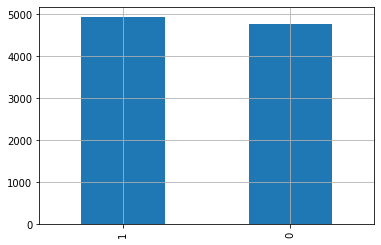

In [45]:
# Увеличим обучающую выборку данными, содержащими Exited = 1. Применим ранее написанную функцию upsample.
features_upsampled, target_upsampled = upsample(x_train, y_train, 4)

# Результат
print(target_upsampled.value_counts(normalize=True))
target_upsampled.value_counts().plot(kind='bar', grid=True);

Посмотрим как изменятся метрики при увеличении выборки.

Решающее дерево

In [46]:
def_tree(features_upsampled, target_upsampled, class_weight=None)

Лучшая глубина решающего дерева 6 при f1-мере 0.5650557620817844. 
AUC-ROC при данных параметрах 0.8259332705836506


Случайный лес

In [47]:
def_forest(features_upsampled, target_upsampled, class_weight=None)

Наилучшее количество деревьев 450 и лучшая глубина 9 случайного леса при f1-мере 0.6262188515709642.          
AUC-ROC при данных параметрах 0.8609926915999755


Логистическая регрессия

In [48]:
def_logistic(features_upsampled, target_upsampled, class_weight=None)

f1-мера логистической регрессии 0.497808939526731. 
AUC-ROC при данных параметрах 0.7818165247465787


In [49]:
print(f'На данном этапе лучшей моделью является: {super_best_model} при f1-мере {super_best_score}')

На данном этапе лучшей моделью является: RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=120,
                       random_state=7) при f1-мере 0.6357142857142857


**Вывод:**
- Для наших моделей метод работы с дисбалансом путем увеличения обучающих данных, содержащих Exited = 1, практически не изменил параметр f1-меры относительно метода взвешивания классов (даже немного уменьшил, возможно это погрешность при обучении).

### Уменьшение выборки

Уменьшим количество обучающих данных, содержащих `Exited = 0`, так чтобы соблюдался баланс классов. Применим ранее написанную функцию downsample. И проверим результат.

0    0.501214
1    0.498786
Name: exited, dtype: float64


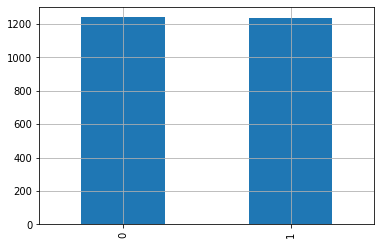

In [50]:
# Уменьшим обучающую выборку данными, содержащими Exited = 1. Применим ранее написанную функцию upsample.
features_downsampled, target_downsampled = downsample(x_train, y_train, 0.26)

# Результат
print(target_downsampled.value_counts(normalize=True))
target_downsampled.value_counts().plot(kind='bar', grid=True);

Посмотрим как изменятся метрики при уменьшении выборки.

Решающее дерево

In [51]:
def_tree(features_downsampled, target_downsampled, class_weight=None)

Лучшая глубина решающего дерева 7 при f1-мере 0.5717017208413003. 
AUC-ROC при данных параметрах 0.8185180180109399


Случайный лес

In [52]:
def_forest(features_downsampled, target_downsampled, class_weight=None)

Наилучшее количество деревьев 90 и лучшая глубина 11 случайного леса при f1-мере 0.6058823529411764.          
AUC-ROC при данных параметрах 0.8520107921073679


Логистическая регрессия

In [53]:
def_logistic(features_downsampled, target_downsampled, class_weight=None)

f1-мера логистической регрессии 0.4967919340054996. 
AUC-ROC при данных параметрах 0.7797156150856941


In [54]:
print(f'На данном этапе лучшей моделью является: {super_best_model} при f1-мере {super_best_score}')

На данном этапе лучшей моделью является: RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=120,
                       random_state=7) при f1-мере 0.6357142857142857


**Вывод:**
- Для наших моделей метод работы с дисбалансом путем уменьшения обучающих данных, содержащих Exited = 1, аналогично как и при увеличении выборки, практически не изменил параметр f1-меры относительно метода взвешивания классов.

### Комбинированный метод

Попробуем комбинированный метод. Немного увеличим количество обучающих данных, содержащих `Exited = 1`. Применим ранее написанную функцию upsample. Для окончательного устранения дисбаланса применим взвешивание классов (укажем в модели параметр class_weight='balanced'). И проверим результат на наилучшем случайном лесе.

Случайный лес

0    0.659063
1    0.340937
Name: exited, dtype: float64


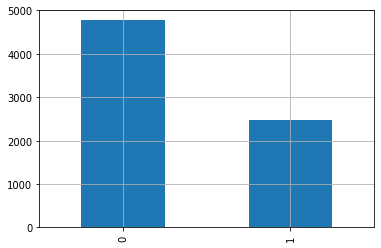

In [55]:
# Увеличим обучающую выборку данными, содержащими Exited = 1. Применим ранее написанную функцию upsample.
features_upsampled, target_upsampled = upsample(x_train, y_train, 2)

# Результат
print(target_upsampled.value_counts(normalize=True))
target_upsampled.value_counts().plot(kind='bar', grid=True);

In [56]:
def_forest(features_upsampled, target_upsampled, class_weight='balanced')

Наилучшее количество деревьев 130 и лучшая глубина 14 случайного леса при f1-мере 0.6251691474966171.          
AUC-ROC при данных параметрах 0.8564593151065932


In [57]:
print(f'На данном этапе лучшей моделью является: {super_best_model} при f1-мере {super_best_score}')

На данном этапе лучшей моделью является: RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=120,
                       random_state=7) при f1-мере 0.6357142857142857


**Вывод:**
- Победил случайный лес с параметрами class_weight='balanced', max_depth=9, n_estimators=120 при при f1-мере равной 0.6357, а это значит что простое взвешивание классов в нашей задачи дало лучший результат в борьбе с дисбалансом классов.
- Для регрессии скорее всего критичен баланс классов, так как она заметно улучшила свои показатели при устранении дисбаланса.

## Тестирование модели

Проверим нашу лучшую модель на тестовой выборке.

In [58]:
# Посчитаем предсказания и вероятность класса = 1, 
predictions = super_best_model.predict(x_test)
probabilities = super_best_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

In [59]:
print('F1-мера для тестовой выборки равна', f1_score(y_test, predictions))

F1-мера для тестовой выборки равна 0.6150341685649203


Построим ROC кривую и посчитаем AUC для нее.

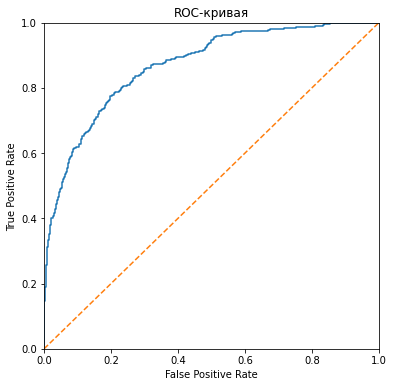

In [60]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [61]:
print('Площадь под ROC кривой равна', roc_auc_score(y_test, probabilities))

Площадь под ROC кривой равна 0.8685557668608516


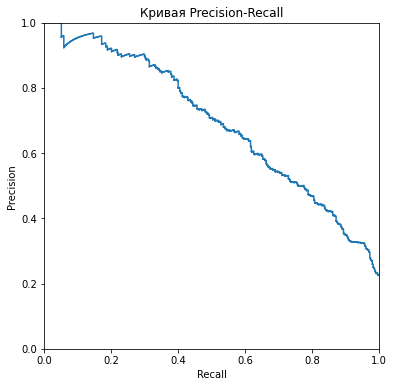

In [62]:
plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

**Вывод:**
- В данной работе мы исследовали предоставленные данные клиентов банка, сделали предобработку, отбросили лишние признаки и заполнили пропуски. Также были обработаны категориальные признаки и стандартизированы числовые данные.
- Было проведено обучение и исследование различных моделей на представленных данных и столкнулись с проблемой дисбаланса.
- Для устранения диспаланса и улучшения качества моделей были применены методы взвешивания классов, увеличения и уменьшения выборок.
- Победила модель случайного леса с параметрами (class_weight='balanced', max_depth=9, n_estimators=120). На тестовой выборке она показала результат F1-меры равной 0.615. Площадь под ROC кривой равной 0.8685.
- ROC-кривая равномерная, показывает как при уменьшении порога вероятности классификации мы увеличиваем количество верных предсказаний, но увы одновременно и увеличивается и ложно положительные результаты.
- PR-кривая показывает как падает точность при уменьшении порога, но растет полнота. Их баланс учитывает f1-мера.
- Наихудший результат показывает логистическая регрессия, особенно она чувствительна оказалась к дисбалансу классов.